In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
wego = pd.read_csv('../data/headway.csv')
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
overload = wego.loc[wego['OVERLOAD_ID'] != 0]
overload

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
219,120230801,1,99458112,2023-08-01,22,2201,1892,345215,1,TO DOWNTOWN,...,NaN,NaN,0,0,0,0,1.0,0,NaN,NaN
220,120230801,1,99458113,2023-08-01,22,2201,1892,345215,1,TO DOWNTOWN,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
221,120230801,1,99458114,2023-08-01,22,2201,1892,345216,1,FROM DOWNTOWN,...,12.966666,-2.033334,0,0,1,0,0.0,0,0.0,NaN
222,120230801,1,99458115,2023-08-01,22,2201,1892,345216,1,FROM DOWNTOWN,...,16.566666,1.566666,0,0,1,0,0.0,0,0.0,NaN
223,120230801,1,99458116,2023-08-01,22,2201,1892,345216,1,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348583,120230930,2,100404632,2023-09-30,52,5211,2783,352188,1,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,1.0,0,NaN,NaN
348584,120230930,2,100404633,2023-09-30,52,5211,2783,352188,1,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
348585,120230930,2,100404634,2023-09-30,52,5211,2783,352188,1,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,1.0,0,NaN,NaN
348586,120230930,2,100404635,2023-09-30,52,5211,2783,352188,1,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN


In [4]:
wego.shape

(350329, 30)

In [5]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

1. What is the overall on-time performance, and what do the overall distribution of adherence look like? 

In [6]:
on_time_performance = wego.loc[wego['ADJUSTED_ONTIME_COUNT'] == 1]
# on_time_performance = on_time_performance.loc[on_time_performance['TRIP_EDGE'] != 2]
on_time_performance_pct = round((len(on_time_performance) / len(wego)) * 100, 2)
print(f"Overall on-time performance is about {on_time_performance_pct}%")

Overall on-time performance is about 77.08%


In [7]:
total = wego['ADJUSTED_ONTIME_COUNT'].sum() + wego['ADJUSTED_LATE_COUNT'].sum() + wego['ADJUSTED_EARLY_COUNT'].sum()
total

338861

([], [])

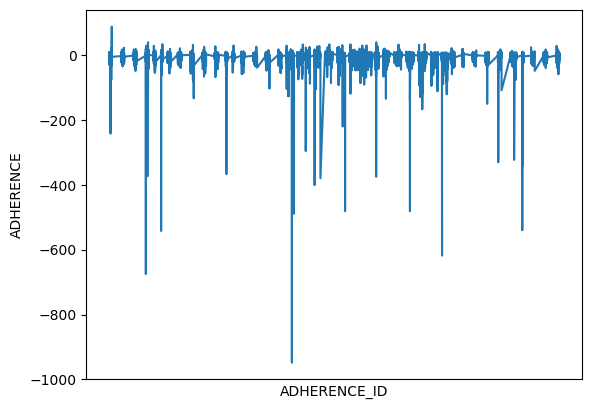

In [8]:
sns.lineplot(data=wego, x=wego['ADHERENCE_ID'], y=wego['ADHERENCE'])
plt.xticks(ticks=[], labels=[])

In [9]:
wego['ROUTE_ABBR'].value_counts().sum()

350329

<Axes: xlabel='ADHERENCE', ylabel='count'>

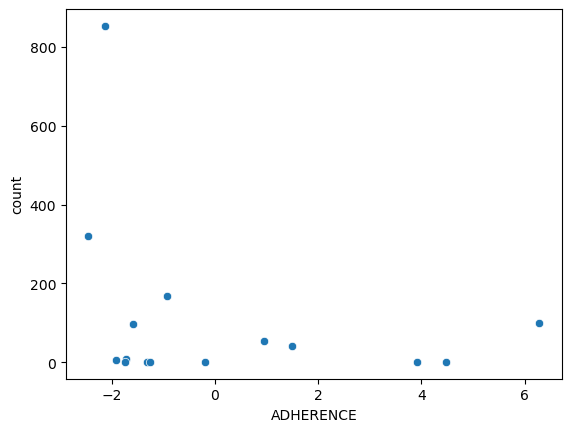

In [10]:
sns.scatterplot(data=wego, x=wego['ADHERENCE'], y=wego['ADHERENCE'].value_counts())

2. How does direction of travel, route, or location affect the on-time performance?

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [13]:
wego['BLOCK_ABBR'].value_counts()

BLOCK_ABBR
300     8894
2312    8532
2310    8233
5003    8086
5004    8048
        ... 
5094      72
8405      72
6401      72
5690      72
9975      72
Name: count, Length: 102, dtype: int64

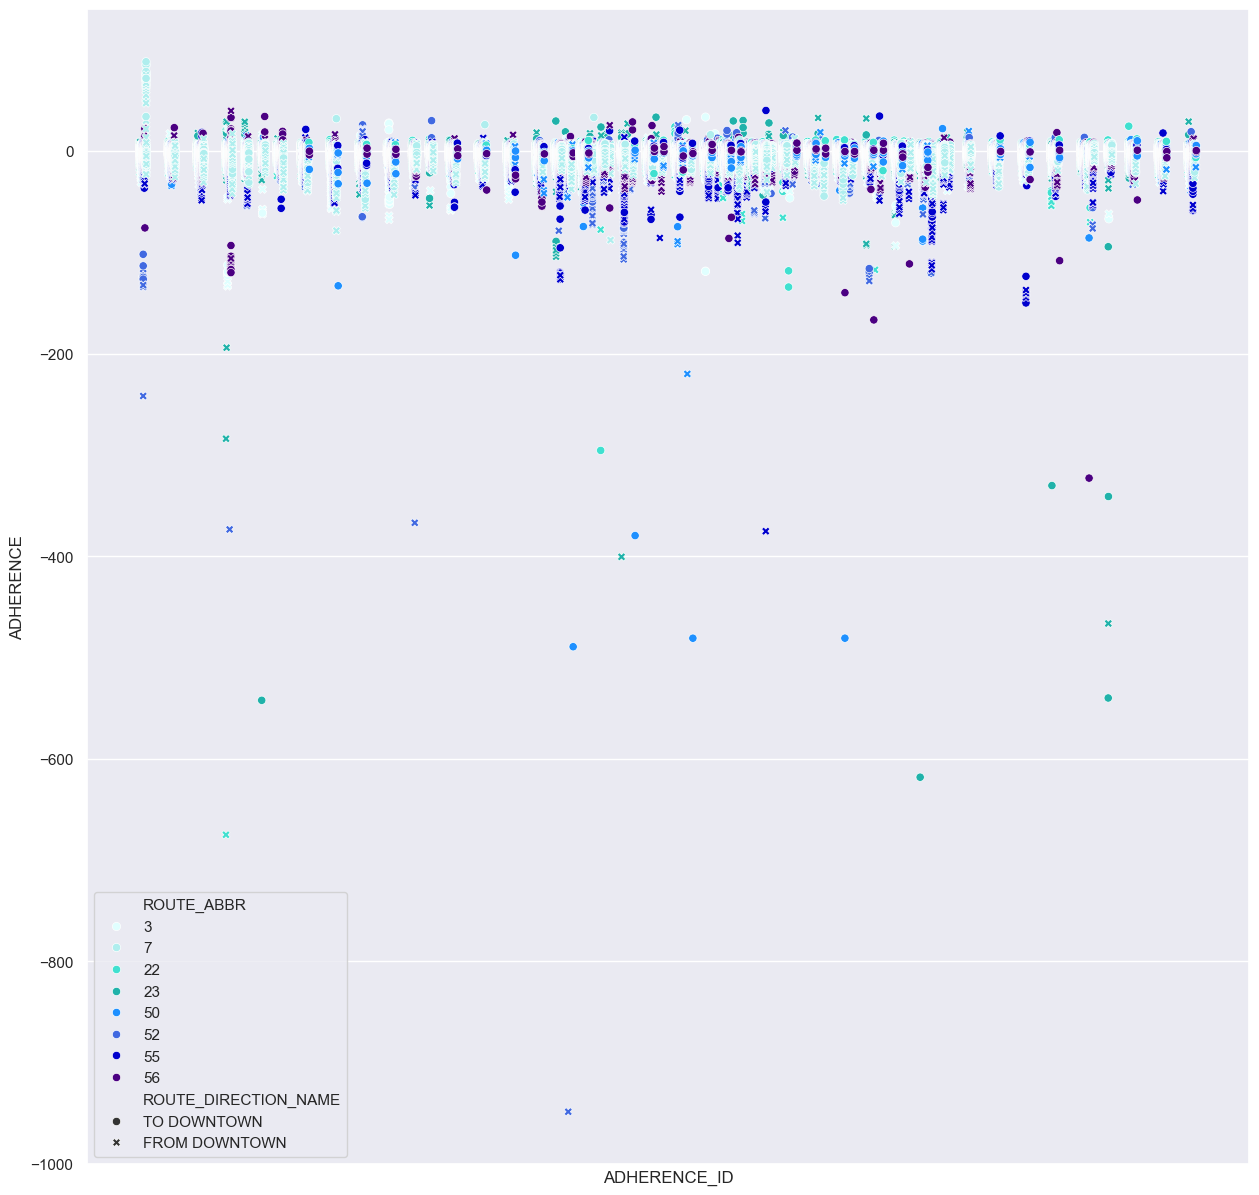

In [14]:
sns.set(rc={"figure.figsize":(15,15)})
sns.scatterplot(data=wego, x=wego['ADHERENCE_ID'], y=wego['ADHERENCE'], hue=wego['ROUTE_ABBR'], palette=['lightcyan', 'paleturquoise', 'turquoise', 'lightseagreen', 'dodgerblue', 'royalblue', 'mediumblue', 'indigo'],  style=wego['ROUTE_DIRECTION_NAME'])
plt.xticks(ticks=[], labels=[])
plt.show()

3. How does time of day or day of week affect on-time performance?

In [15]:
wego['SCHEDULED_TIME_DT'] = pd.to_datetime(wego['SCHEDULED_TIME'])
wego['WEEKDAY'] = wego['SCHEDULED_TIME_DT'].dt.day_name()
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,2023-08-01 04:42:00,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:46:00,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:54:00,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-01 05:10:00,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,2023-08-01 05:15:00,Tuesday


<Axes: xlabel='WEEKDAY', ylabel='ADHERENCE'>

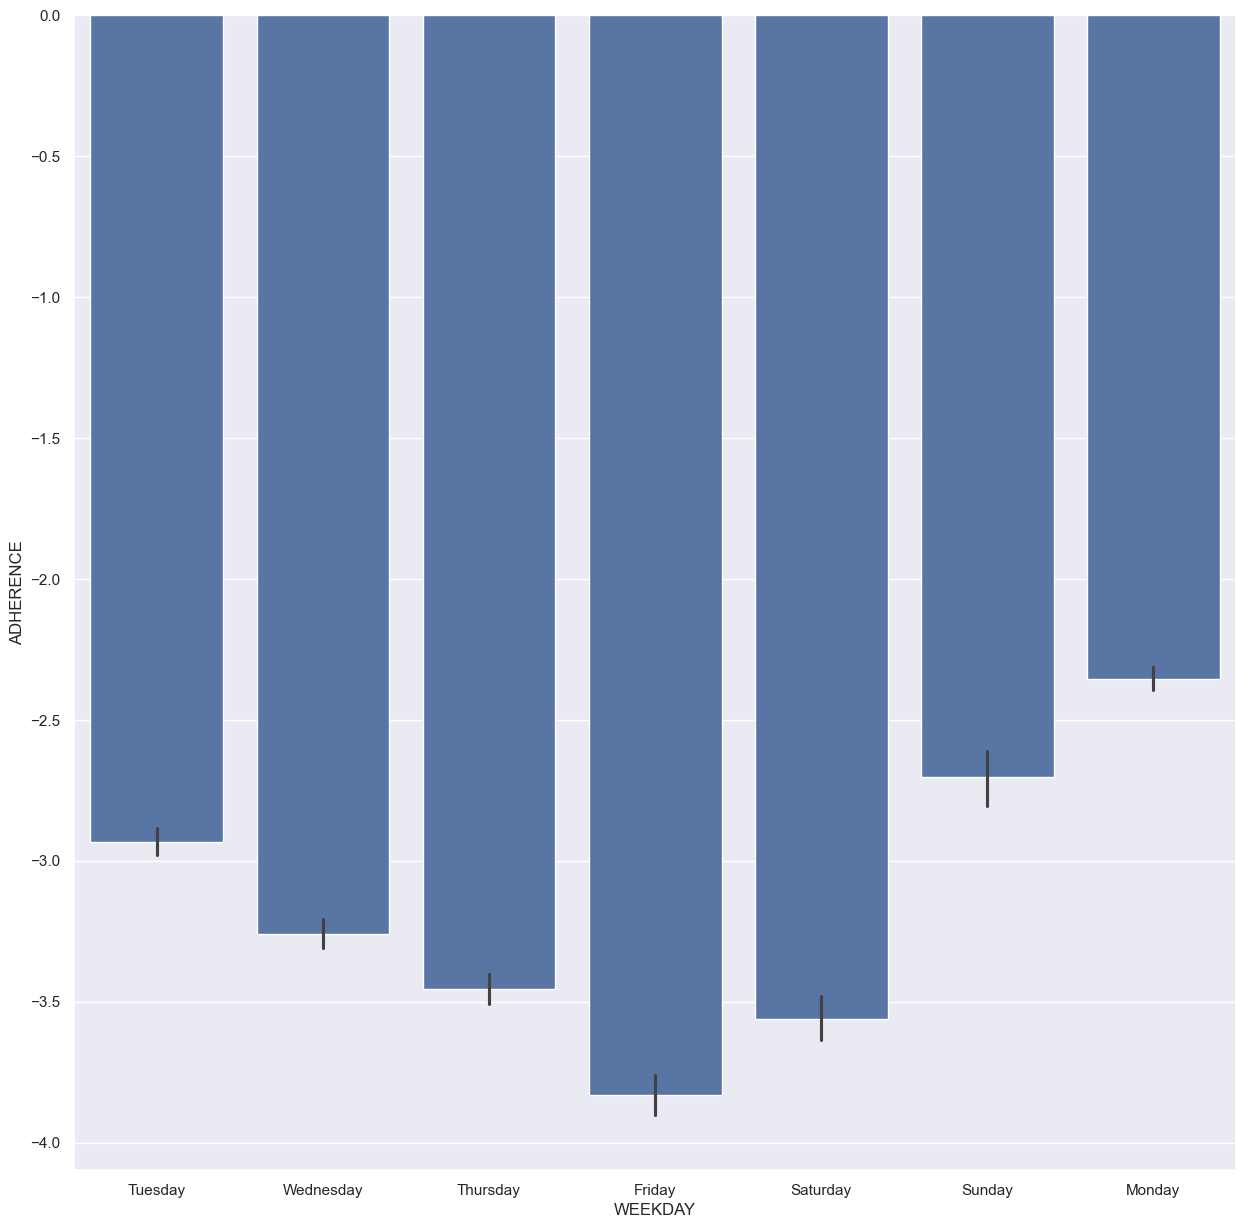

In [16]:
sns.barplot(data=wego, x=wego['WEEKDAY'], y=wego['ADHERENCE'])

In [17]:
weekday_mean = wego.groupby('WEEKDAY')['ADHERENCE'].mean()
weekday_mean

WEEKDAY
Friday      -3.829856
Monday      -2.354027
Saturday    -3.560335
Sunday      -2.702873
Thursday    -3.453737
Tuesday     -2.932405
Wednesday   -3.258849
Name: ADHERENCE, dtype: float64

<Axes: xlabel='SCHEDULED_TIME_DT', ylabel='ADHERENCE'>

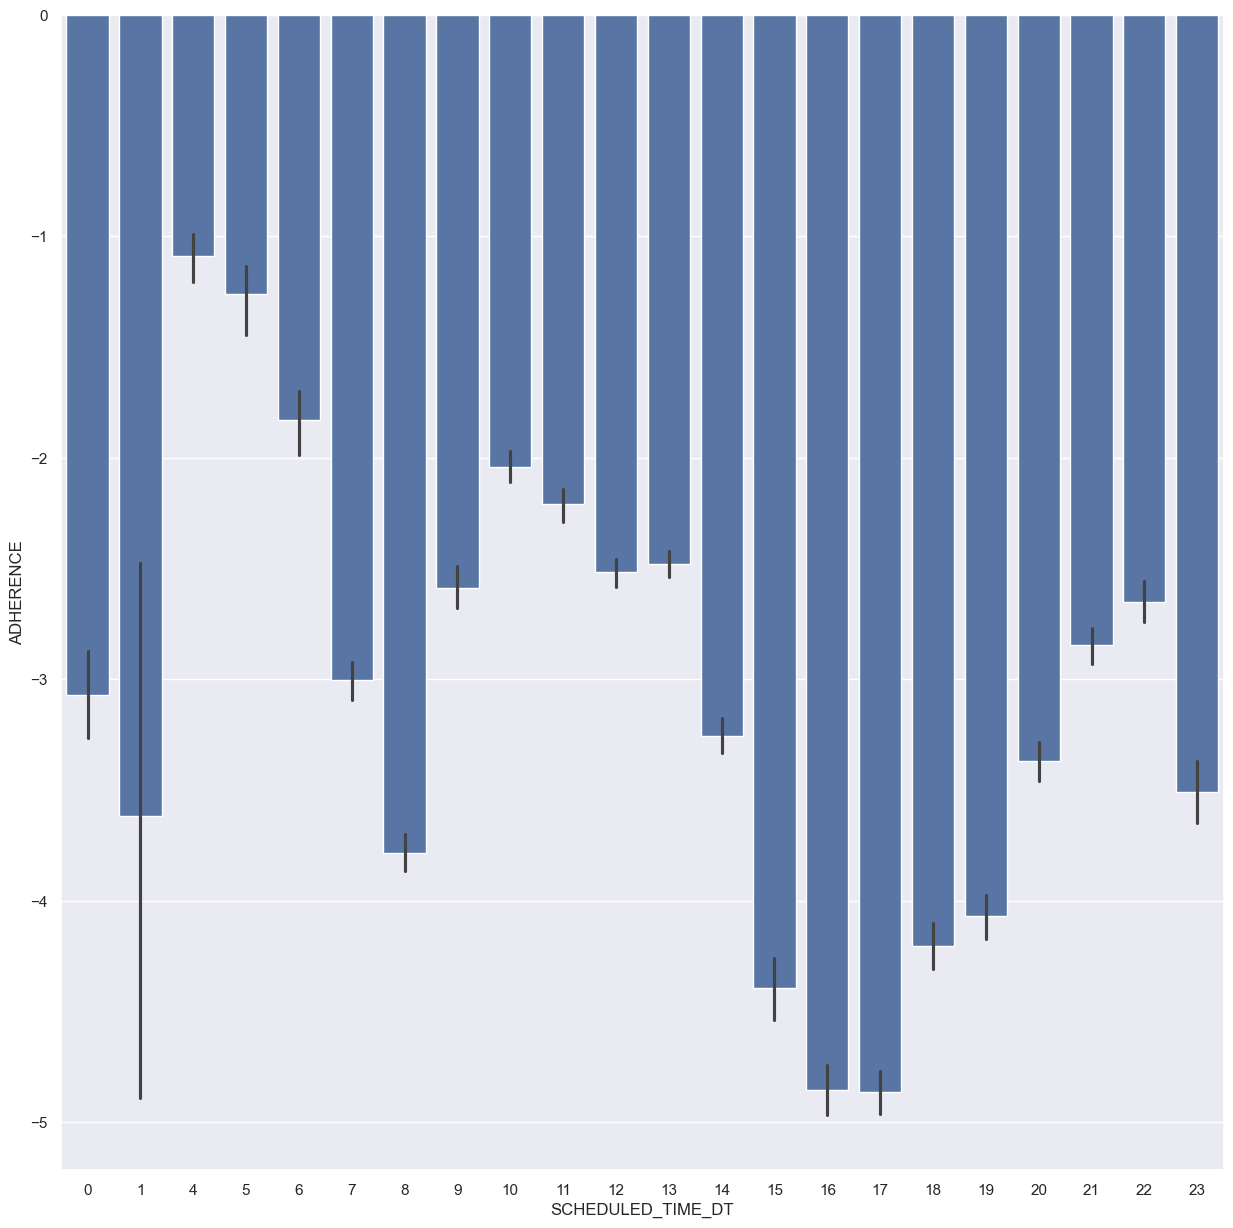

In [18]:
sns.barplot(data=wego, x=wego['SCHEDULED_TIME_DT'].dt.hour, y=wego['ADHERENCE'])

In [19]:
hour_sep = wego['SCHEDULED_TIME_DT'].dt.hour
hour_mean = wego.groupby(hour_sep)['ADHERENCE'].mean()
hour_mean

SCHEDULED_TIME_DT
0    -3.071600
1    -3.618168
4    -1.089960
5    -1.261005
6    -1.831436
7    -3.003120
8    -3.783631
9    -2.585913
10   -2.040670
11   -2.209074
12   -2.517117
13   -2.481100
14   -3.255852
15   -4.395507
16   -4.855838
17   -4.865348
18   -4.203048
19   -4.068211
20   -3.368831
21   -2.846955
22   -2.651855
23   -3.508210
Name: ADHERENCE, dtype: float64

4. How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.

In [20]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,2023-08-01 04:42:00,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:46:00,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:54:00,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-01 05:10:00,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,2023-08-01 05:15:00,Tuesday


In [21]:
wego['OPERATOR'].value_counts()

OPERATOR
2352    2970
1266    2911
1147    2710
1133    2625
2424    2577
        ... 
2256       6
56         3
473        2
0          1
656        1
Name: count, Length: 341, dtype: int64

In [22]:
op_ad_mean = wego.groupby('OPERATOR')['ADHERENCE'].mean()
op_ad_mean

OPERATOR
0       8.916666
56     -1.138889
235    -3.947222
244    -3.466666
301    -4.971171
          ...   
3149   -0.993939
3156   -4.489942
3165   -7.501562
3166   -2.473333
3173   -2.591666
Name: ADHERENCE, Length: 341, dtype: float64

In [23]:
op_ad_mean.describe()

count    341.000000
mean      -3.446736
std        2.649127
min      -22.066666
25%       -4.351053
50%       -3.147859
75%       -1.935147
max        8.916666
Name: ADHERENCE, dtype: float64

<Axes: xlabel='OPERATOR', ylabel='ADHERENCE'>

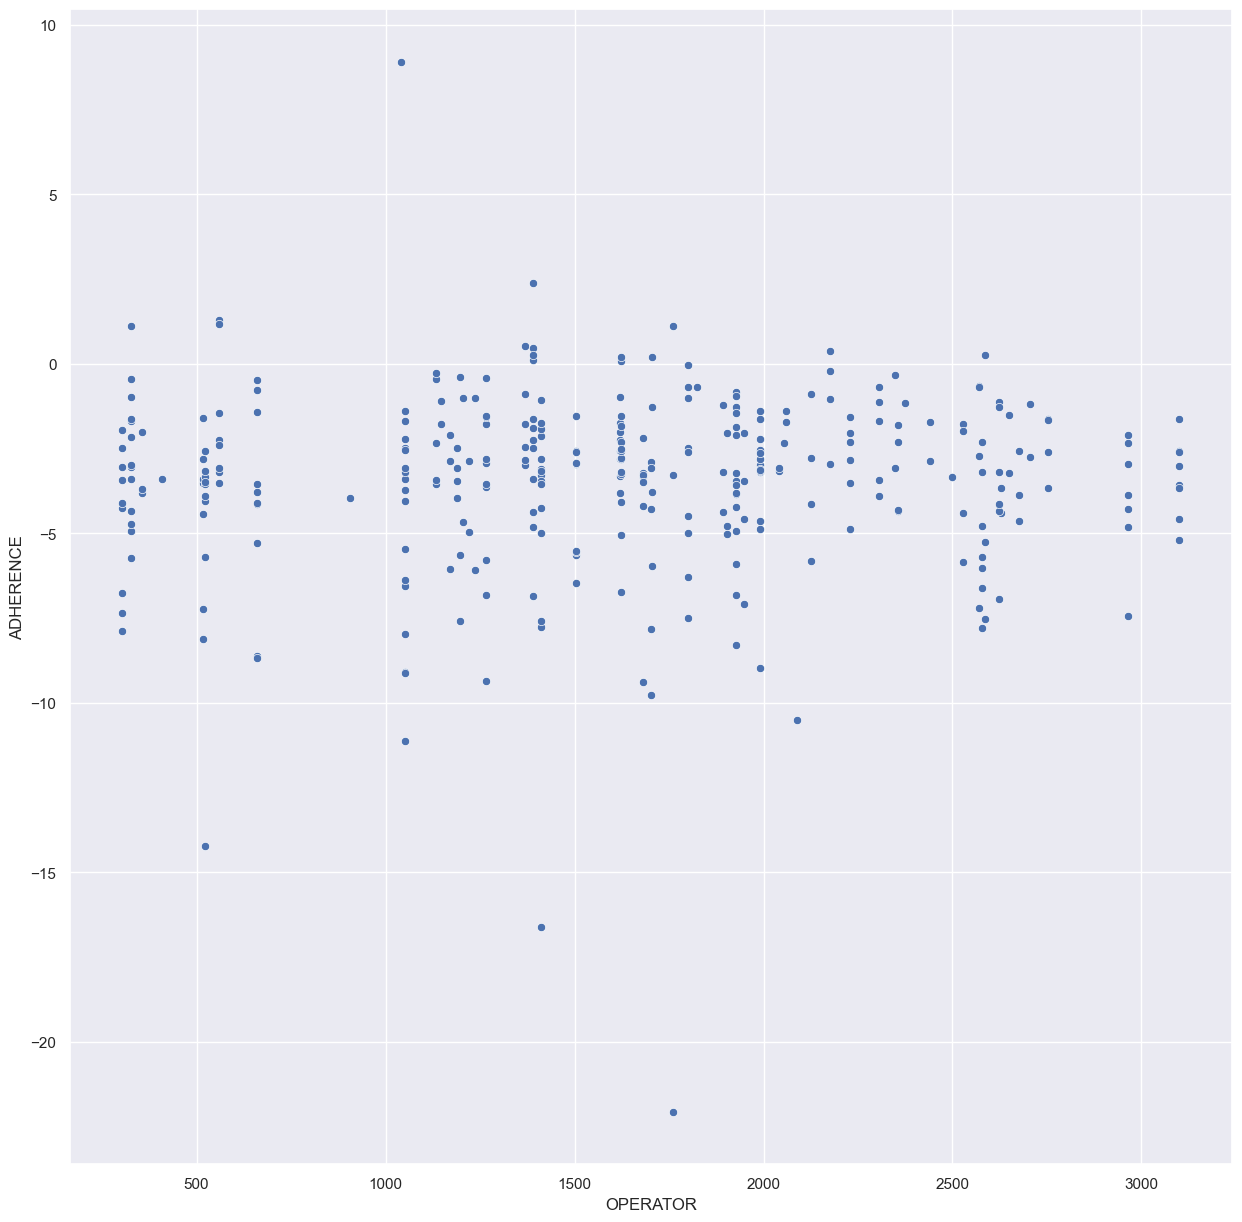

In [24]:
sns.scatterplot(data=wego, x=wego['OPERATOR'], y=wego.groupby('OPERATOR')['ADHERENCE'].mean())

5. Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

<Axes: xlabel='HDWY_DEV', ylabel='ADHERENCE'>

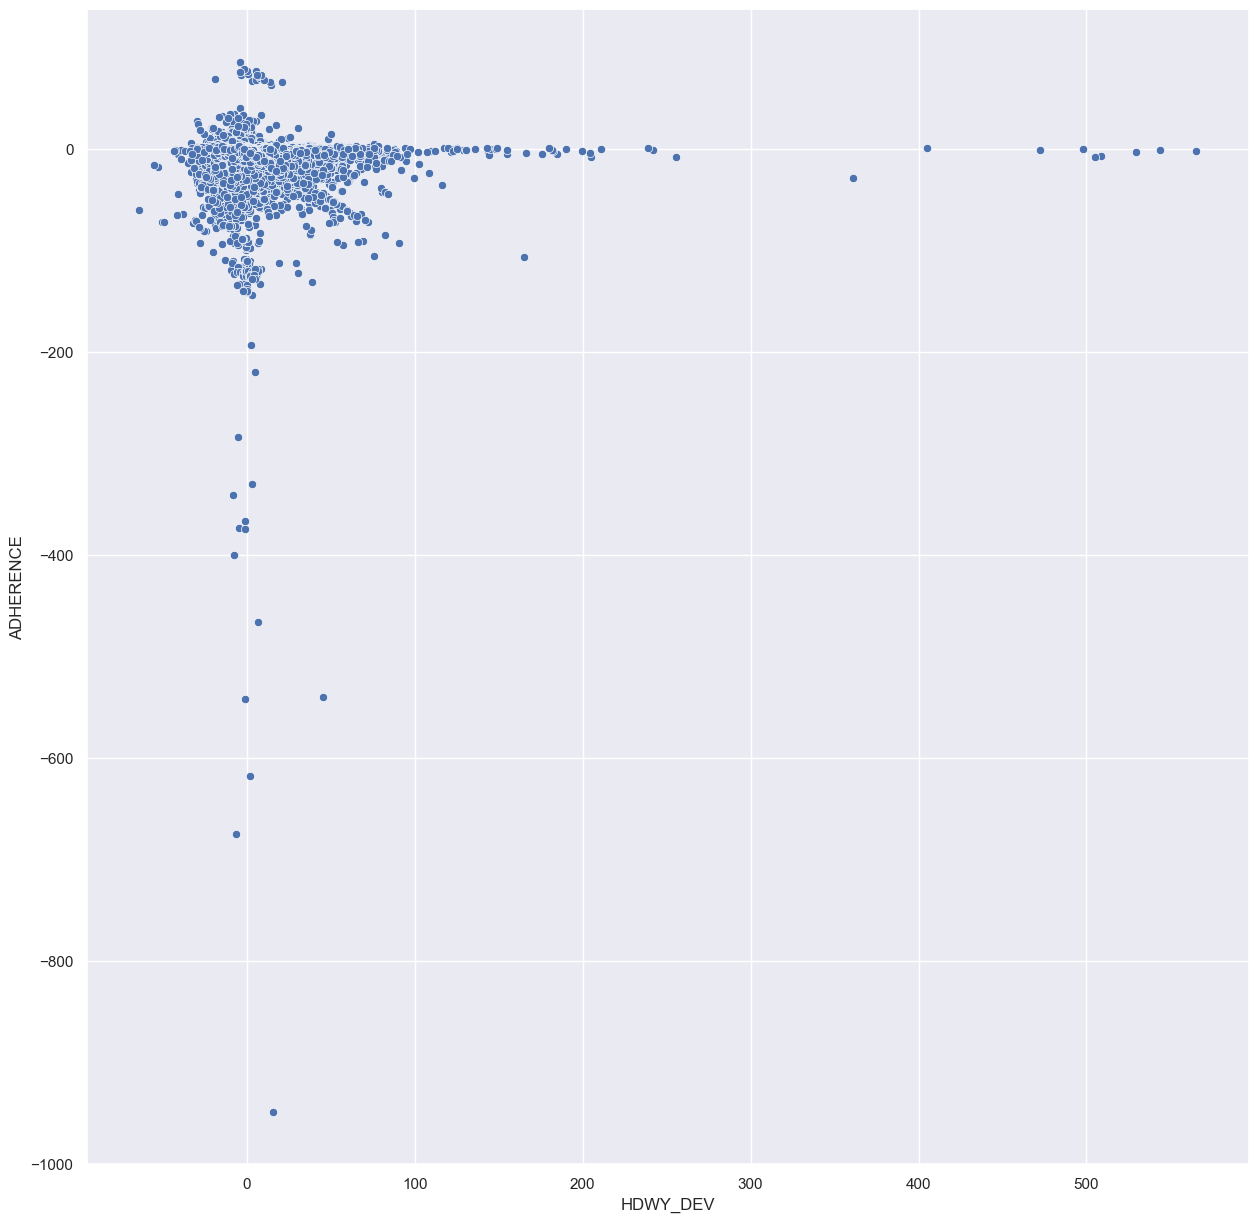

In [25]:
sns.scatterplot(data=wego, x=wego['HDWY_DEV'], y=wego['ADHERENCE'])

In [26]:
wego[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.206794
ADHERENCE,-0.206794,1.000000


**Stretch Goals:**  

6. How much impact does being late or too spaced out at the first stop have downstream?  

In [27]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,2023-08-01 04:42:00,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:46:00,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:54:00,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-01 05:10:00,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,2023-08-01 05:15:00,Tuesday


In [28]:
first_late = wego.loc[(wego['TRIP_EDGE'] == 1) & (wego['ADJUSTED_LATE_COUNT'] == 1)]
first_late

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY
91,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 19:35:00,2023-08-01 19:19:31,2023-08-01 19:41:31,-6.516666,50.0,54.166666,4.166666,0,1,0,0,0.0,0,22.000000,19.0,2023-08-01 19:35:00,Tuesday
94,120230801,1,99457984,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 20:15:00,2023-08-01 20:00:11,2023-08-01 20:22:05,-7.083333,30.0,37.316666,7.316666,0,1,0,0,0.0,0,21.900000,15.0,2023-08-01 20:15:00,Tuesday
188,120230801,1,99458080,2023-08-01,22,2201,2427,345230,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 14:45:00,2023-08-01 14:25:50,2023-08-01 14:51:22,-6.366666,12.0,16.116666,4.116666,0,1,0,0,0.0,0,25.533333,10.0,2023-08-01 14:45:00,Tuesday
235,120230801,1,99458129,2023-08-01,22,2202,1190,345301,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 11:50:00,2023-08-01 11:36:28,2023-08-01 11:56:56,-6.933333,12.0,19.333333,7.333333,0,1,0,0,0.0,0,20.466666,10.0,2023-08-01 11:50:00,Tuesday
249,120230801,1,99458143,2023-08-01,22,2202,1190,345305,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 14:20:00,2023-08-01 14:03:32,2023-08-01 14:26:34,-6.566666,12.0,18.516666,6.516666,0,1,0,0,0.0,0,23.033333,10.0,2023-08-01 14:20:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350091,120230930,2,100406171,2023-09-30,56,5605,3013,353014,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 16:35:00,2023-09-30 16:38:41,2023-09-30 16:42:05,-7.083333,20.0,22.066666,2.066666,0,1,0,0,0.0,1,3.400000,NaN,2023-09-30 16:35:00,Saturday
350251,120230930,2,100406535,2023-09-30,7,701,2531,353394,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 23:46:00,2023-10-02 00:01:35,2023-10-01 00:01:35,-15.583333,60.0,72.333333,12.333333,0,1,0,0,0.0,0,0.000000,NaN,2023-09-30 23:46:00,Saturday
350254,120230930,2,100406538,2023-09-30,7,701,2531,353395,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-10-01 00:15:00,2023-10-03 00:21:43,2023-10-02 00:21:43,-6.716666,60.0,64.183333,4.183333,0,1,0,0,0.0,0,0.000000,NaN,2023-10-01 00:15:00,Sunday
350302,120230930,2,100406588,2023-09-30,7,702,2312,353441,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 17:45:00,2023-09-30 17:43:06,2023-09-30 17:56:57,-11.950000,30.0,39.933333,9.933333,0,1,0,0,0.0,0,13.850000,12.0,2023-09-30 17:45:00,Saturday


In [29]:
first_late_ids = first_late['TRIP_ID'].to_list()
first_late_ids

[345131,
 345132,
 345230,
 345301,
 345305,
 345307,
 345311,
 345315,
 345436,
 345438,
 345440,
 346063,
 346076,
 346214,
 346215,
 346218,
 346224,
 346226,
 346242,
 346289,
 346812,
 346923,
 346945,
 346978,
 346979,
 346982,
 346983,
 346984,
 346986,
 346987,
 347095,
 347098,
 347106,
 347175,
 347176,
 347177,
 347234,
 347286,
 347287,
 347288,
 347425,
 347427,
 347443,
 347551,
 347640,
 347644,
 347723,
 347724,
 347726,
 347727,
 347728,
 347733,
 347791,
 347855,
 347856,
 347857,
 347858,
 347859,
 347863,
 347880,
 347889,
 347890,
 347961,
 348060,
 348172,
 348215,
 348217,
 348270,
 348271,
 348275,
 348494,
 348495,
 348496,
 348497,
 348498,
 348499,
 348500,
 348501,
 348504,
 348645,
 345310,
 345436,
 345440,
 345455,
 345468,
 345490,
 345493,
 345509,
 345514,
 345593,
 345660,
 345730,
 346065,
 346209,
 346211,
 346223,
 346224,
 346226,
 346231,
 346234,
 346380,
 346935,
 346937,
 346974,
 347045,
 347046,
 347093,
 347099,
 347103,
 347106,
 347109,
 

In [30]:
first_late_trips = wego.loc[wego['TRIP_ID'].isin(first_late_ids)]
first_late_trips

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY
85,120230801,1,99457975,2023-08-01,22,2200,2689,345129,0,TO DOWNTOWN,YGKG,7.0,1,36.203239,-86.840636,2023-08-01 18:21:00,2023-08-01 18:20:02,2023-08-01 18:20:02,0.966666,50.0,44.866666,-5.133334,0,0,1,1,1.0,0,0.000000,NaN,2023-08-01 18:21:00,Tuesday
86,120230801,1,99457976,2023-08-01,22,2200,2689,345129,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 18:29:00,2023-08-01 18:32:42,2023-08-01 18:32:42,-3.700000,25.0,27.166666,2.166666,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 18:29:00,Tuesday
87,120230801,1,99457977,2023-08-01,22,2200,2689,345129,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 18:45:00,2023-08-01 18:43:10,2023-08-01 18:43:10,1.833333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-01 18:45:00,Tuesday
91,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 19:35:00,2023-08-01 19:19:31,2023-08-01 19:41:31,-6.516666,50.0,54.166666,4.166666,0,1,0,0,0.0,0,22.000000,19.0,2023-08-01 19:35:00,Tuesday
92,120230801,1,99457982,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 19:44:00,2023-08-01 19:50:44,2023-08-01 19:50:44,-6.733333,25.0,30.816666,5.816666,0,1,0,0,0.0,0,0.000000,NaN,2023-08-01 19:44:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,2023-09-30 22:23:00,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,2023-09-30 22:38:00,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,2023-09-30 22:45:00,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,2023-09-30 22:59:00,Saturday


<Axes: xlabel='TRIP_ID', ylabel='ADHERENCE'>

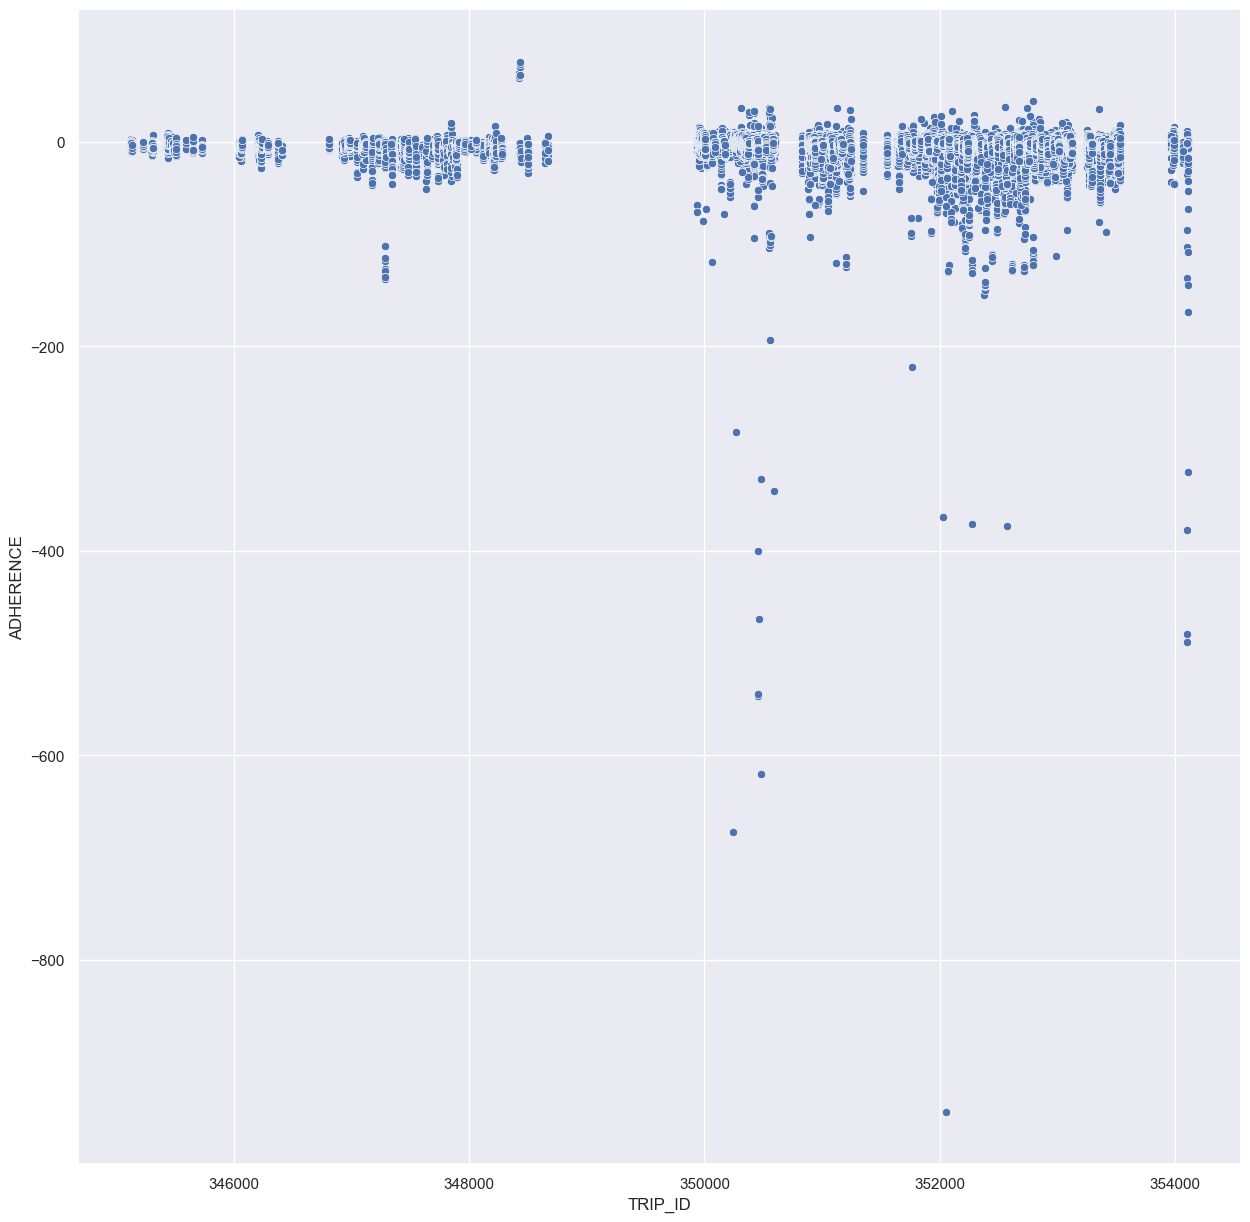

In [31]:
sns.scatterplot(data=first_late_trips, x=first_late_trips['TRIP_ID'], y=first_late_trips['ADHERENCE'])

In [32]:
first_late_trips['ADHERENCE'].mean()

-3.8778324708754743

In [33]:
wego['ADHERENCE'].mean()

-3.1887964314276354

<Axes: xlabel='TRIP_EDGE', ylabel='ADHERENCE'>

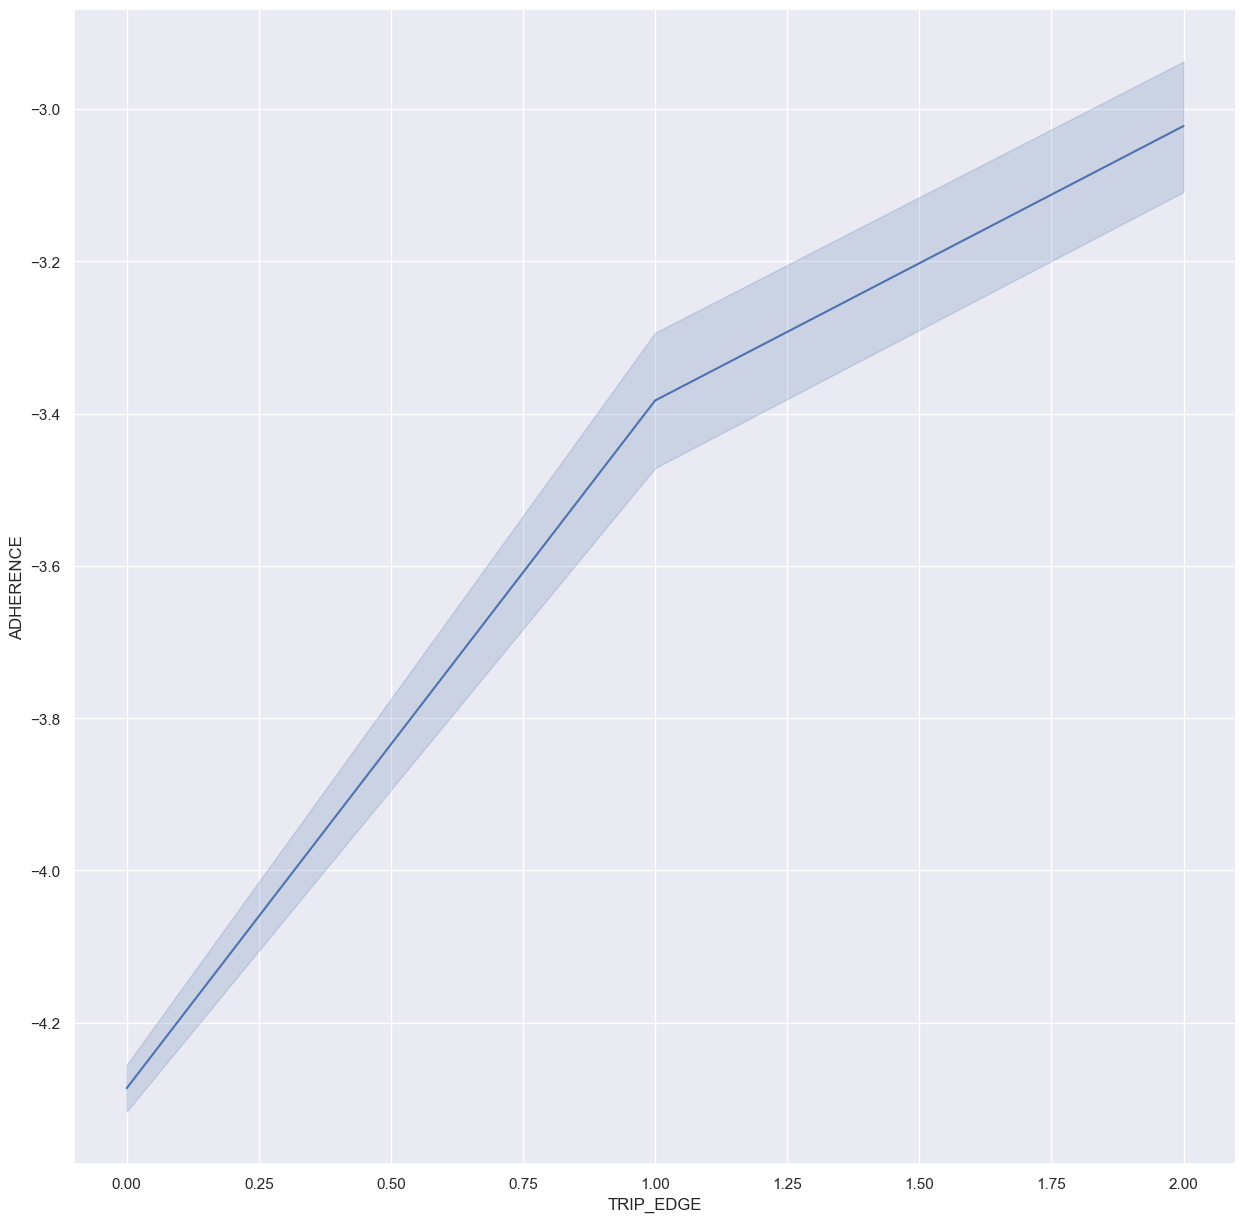

In [34]:
sns.lineplot(data=first_late_trips[['TRIP_ID']], x=first_late_trips['TRIP_EDGE'], y=first_late_trips['ADHERENCE'])

In [35]:
#first_late_trips.index[first_late_trips['TRIP_ID']].to_list()

# new_index = []
# for x, row in first_late_trips.iterrows():
#     if row['TRIP_ID']

In [36]:
#plt.plot(data=first_late_trips['TRIP_ID'][345129], y=first_late_trips['ADHERENCE'], 

7. What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer **scheduled** layover time have more stable headway values?  

In [37]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,2023-08-01 04:42:00,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:46:00,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:54:00,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-01 05:10:00,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,2023-08-01 05:15:00,Tuesday


In [38]:
wego[['DWELL_IN_MINS', 'ADHERENCE']].corr()

,DWELL_IN_MINS,ADHERENCE
DWELL_IN_MINS,1.000000,-0.182522
ADHERENCE,-0.182522,1.000000


In [39]:
wego[['SCHEDULED_HDWY', 'ACTUAL_HDWY']].corr()

,SCHEDULED_HDWY,ACTUAL_HDWY
SCHEDULED_HDWY,1.000000,0.862633
ACTUAL_HDWY,0.862633,1.000000


In [40]:
dwell_sort = wego.sort_values(by='DWELL_IN_MINS', ascending=False)
dwell_sort = dwell_sort.dropna(subset=['DWELL_IN_MINS'])
dwell_sort_late = dwell_sort.head(5)
dwell_sort_early = dwell_sort.tail(5)
gap_ids = dwell_sort_late['TRIP_ID'].to_list()
bunch_ids = dwell_sort_early['TRIP_ID'].to_list()

In [41]:
gap=(
    wego
        .loc[wego['TRIP_ID'].isin(gap_ids)]
        .sort_values(by=['TRIP_ID'])
)

In [42]:
bunch=(
    wego
        .loc[wego['TRIP_ID'].isin(bunch_ids)]
        .sort_values(by=['TRIP_ID'])
)

In [43]:
gap['HDWY_DEV_PCT'] = round((gap['HDWY_DEV'] / gap['SCHEDULED_HDWY']) * 100, 2)
gap

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY,HDWY_DEV_PCT
19788,120230804,1,99559760,2023-08-04,22,2211,1743,350239,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-04 07:00:00,2023-08-04 06:48:12,2023-08-04 18:15:00,-675.000000,15.0,8.233333,-6.766667,0,1,0,0,0.0,0,686.800000,5.0,2023-08-04 07:00:00,Friday,-45.11
155268,120230828,1,100222694,2023-08-28,22,2211,1394,350239,0,FROM DOWNTOWN,25ACLARK,6.0,2,36.186350,-86.816998,2023-08-28 07:16:00,2023-08-28 07:11:42,2023-08-28 07:11:42,4.300000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-28 07:16:00,Monday,NaN
161738,120230829,1,100256623,2023-08-29,22,2211,2649,350239,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-29 07:00:00,2023-08-29 06:51:39,2023-08-29 07:01:32,-1.533333,15.0,16.400000,1.400000,0,0,1,0,0.0,0,9.883333,5.0,2023-08-29 07:00:00,Tuesday,9.33
161739,120230829,1,100256624,2023-08-29,22,2211,2649,350239,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-29 07:10:00,2023-08-29 07:09:48,2023-08-29 07:09:48,0.200000,15.0,15.083333,0.083333,0,0,1,0,0.0,0,0.000000,NaN,2023-08-29 07:10:00,Tuesday,0.56
161740,120230829,1,100256625,2023-08-29,22,2211,2649,350239,0,FROM DOWNTOWN,25ACLARK,6.0,2,36.186350,-86.816998,2023-08-29 07:16:00,2023-08-29 07:10:14,2023-08-29 07:10:14,5.766666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-29 07:16:00,Tuesday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248927,120230913,1,100697049,2023-09-13,52,5202,1052,352052,0,FROM DOWNTOWN,WMRT,5.0,0,36.082309,-86.727340,2023-09-13 06:41:00,2023-09-13 06:44:14,2023-09-13 06:44:14,-3.233333,16.0,16.450000,0.450000,0,0,1,0,0.0,0,0.000000,NaN,2023-09-13 06:41:00,Wednesday,2.81
248928,120230913,1,100697050,2023-09-13,52,5202,1052,352052,0,FROM DOWNTOWN,HCKP,9.0,2,36.048934,-86.713854,2023-09-13 06:50:00,2023-09-13 06:51:35,2023-09-13 06:51:35,-1.583333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-09-13 06:50:00,Wednesday,NaN
43272,120230808,1,99652197,2023-08-08,52,5202,1052,352052,0,FROM DOWNTOWN,NVFG,3.0,0,36.135034,-86.759818,2023-08-08 06:27:00,2023-08-08 06:28:22,2023-08-08 06:28:22,-1.366666,16.0,15.016666,-0.983334,0,0,1,0,0.0,0,0.000000,NaN,2023-08-08 06:27:00,Tuesday,-6.15
143571,120230825,1,100172069,2023-08-25,52,5202,1052,352052,0,FROM DOWNTOWN,HCKP,9.0,2,36.048934,-86.713854,2023-08-25 06:50:00,2023-08-25 06:50:11,2023-08-25 06:50:11,-0.183333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-25 06:50:00,Friday,NaN


In [44]:
bunch['HDWY_DEV_PCT'] = round((bunch['HDWY_DEV'] / bunch['SCHEDULED_HDWY']) * 100, 2)
bunch

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY,HDWY_DEV_PCT
106582,120230819,2,99988250,2023-08-19,22,2200,2217,349985,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-19 11:38:00,2023-08-19 11:40:45,2023-08-19 11:40:45,-2.750000,25.0,27.616666,2.616666,0,0,1,0,0.0,0,0.000000,NaN,2023-08-19 11:38:00,Saturday,10.47
66182,120230812,2,99779346,2023-08-12,22,2200,2441,349985,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-12 11:48:00,2023-08-12 11:51:55,2023-08-12 11:51:55,-3.916666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-12 11:48:00,Saturday,NaN
106583,120230819,2,99988251,2023-08-19,22,2200,2217,349985,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-19 11:48:00,2023-08-19 11:47:24,2023-08-19 11:47:24,0.600000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-19 11:48:00,Saturday,NaN
187348,120230902,2,100387695,2023-09-02,22,2200,2040,349985,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-02 11:25:00,2023-09-02 11:07:58,2023-09-02 11:25:48,-0.800000,25.0,21.300000,-3.700000,0,0,1,0,0.0,0,17.833333,10.0,2023-09-02 11:25:00,Saturday,-14.80
265482,120230916,2,100001331,2023-09-16,22,2200,1938,349985,1,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-09-16 11:48:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN,2023-09-16 11:48:00,Saturday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46304,120230808,1,99655317,2023-08-08,56,5690,623,353123,0,FROM DOWNTOWN,MEIG,7.0,2,36.176017,-86.760399,2023-08-08 07:30:00,2023-08-08 07:30:03,2023-08-08 07:32:41,-2.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,2.633333,NaN,2023-08-08 07:30:00,Tuesday,NaN
133604,120230823,1,100107176,2023-08-23,56,5690,623,353123,0,FROM DOWNTOWN,MEIG,7.0,2,36.176017,-86.760399,2023-08-23 07:30:00,2023-08-23 07:28:57,2023-08-23 07:31:17,-1.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,2.333333,NaN,2023-08-23 07:30:00,Wednesday,NaN
245455,120230912,1,100665473,2023-09-12,56,5690,1782,353123,0,FROM DOWNTOWN,MEIG,7.0,2,36.176017,-86.760399,2023-09-12 07:30:00,2023-09-12 07:33:35,2023-09-12 07:37:07,-7.116666,NaN,NaN,NaN,0,1,0,0,NaN,0,3.533333,NaN,2023-09-12 07:30:00,Tuesday,NaN
140100,120230824,1,100141216,2023-08-24,56,5690,623,353123,0,FROM DOWNTOWN,MCC5_7,5.0,1,36.167091,-86.781923,2023-08-24 07:15:00,2023-08-24 07:19:03,2023-08-24 07:25:39,-10.650000,NaN,NaN,NaN,0,1,0,0,0.0,0,6.600000,NaN,2023-08-24 07:15:00,Thursday,NaN


In [45]:
gap.groupby('TRIP_ID')['HDWY_DEV_PCT'].mean()

TRIP_ID
350239     8.208354
350455    10.450833
350478    13.078261
352052    -1.101484
Name: HDWY_DEV_PCT, dtype: float64

In [46]:
gap.groupby('TRIP_ID')['HDWY_DEV'].mean()

TRIP_ID
350239    1.231223
350455    2.090278
350478    1.569384
352052   -0.159248
Name: HDWY_DEV, dtype: float64

In [47]:
bunch.groupby('TRIP_ID')['HDWY_DEV_PCT'].mean()

TRIP_ID
349985    5.734706
350083    6.910556
351642   -6.187744
352893   -7.725633
353123         NaN
Name: HDWY_DEV_PCT, dtype: float64

In [48]:
bunch.groupby('TRIP_ID')['HDWY_DEV'].mean()

TRIP_ID
349985    1.433333
350083    3.065740
351642   -0.937607
352893   -0.772574
353123         NaN
Name: HDWY_DEV, dtype: float64

In [49]:
gap[['HDWY_DEV', 'HDWY_DEV_PCT']].describe()

,HDWY_DEV,HDWY_DEV_PCT
count,338.000000,338.000000
mean,0.716124,5.344201
std,6.193048,45.131177
min,-14.450000,-76.000000
25%,-2.312500,-15.047500
50%,-0.283334,-1.835000
75%,1.583333,10.605000
max,45.200000,226.000000


In [50]:
bunch[['HDWY_DEV', 'HDWY_DEV_PCT']].describe()

,HDWY_DEV,HDWY_DEV_PCT
count,406.000000,406.000000
mean,-0.419130,-5.125591
std,4.881626,26.184420
min,-11.416667,-95.670000
25%,-2.162500,-16.875000
50%,-0.700000,-4.530000
75%,1.162500,7.817500
max,51.100000,102.200000


In [51]:
bunch = bunch.sort_index()
gap = gap.sort_index()

In [52]:
bunch

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY,HDWY_DEV_PCT
21552,120230804,1,99562644,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-08-04 09:45:00,2023-08-04 09:34:38,2023-08-04 09:48:31,-3.516666,15.0,16.316666,1.316666,0,0,1,0,0.0,1,13.883333,NaN,2023-08-04 09:45:00,Friday,8.78
21553,120230804,1,99562645,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,28&CHARL,13.0,0,36.154039,-86.818055,2023-08-04 09:55:00,2023-08-04 10:00:23,2023-08-04 10:00:23,-5.383333,15.0,17.900000,2.900000,0,0,1,0,0.0,0,0.000000,NaN,2023-08-04 09:55:00,Friday,19.33
21554,120230804,1,99562646,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,CH46,14.0,0,36.152286,-86.842032,2023-08-04 09:59:00,2023-08-04 10:05:34,2023-08-04 10:05:34,-6.566666,15.0,18.983333,3.983333,0,1,0,0,0.0,0,0.000000,NaN,2023-08-04 09:59:00,Friday,26.56
21555,120230804,1,99562647,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,WHBG,15.0,0,36.150052,-86.858652,2023-08-04 10:03:00,2023-08-04 10:10:56,2023-08-04 10:14:32,-11.533333,15.0,23.533333,8.533333,0,1,0,0,0.0,0,3.600000,NaN,2023-08-04 10:03:00,Friday,56.89
21556,120230804,1,99562648,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,HLWD,16.0,0,36.138948,-86.880902,2023-08-04 10:11:00,2023-08-04 10:21:33,2023-08-04 10:21:33,-10.550000,16.0,24.033333,8.033333,0,1,0,0,0.0,0,0.000000,NaN,2023-08-04 10:11:00,Friday,50.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346342,120230930,2,100401578,2023-09-30,22,2201,2497,350083,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 13:30:00,2023-09-30 13:14:52,2023-09-30 13:31:40,-1.666666,25.0,26.400000,1.400000,0,0,1,0,0.0,1,16.800000,NaN,2023-09-30 13:30:00,Saturday,5.60
346343,120230930,2,100401579,2023-09-30,22,2201,2497,350083,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-09-30 13:43:00,2023-09-30 13:45:19,2023-09-30 13:45:19,-2.316666,25.0,27.883333,2.883333,0,0,1,0,0.0,0,0.000000,NaN,2023-09-30 13:43:00,Saturday,11.53
346344,120230930,2,100401580,2023-09-30,22,2201,2497,350083,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,2023-09-30 13:47:00,2023-09-30 13:50:19,2023-09-30 13:50:19,-3.316666,50.0,42.166666,-7.833334,0,0,1,0,0.0,0,0.000000,NaN,2023-09-30 13:47:00,Saturday,-15.67
346345,120230930,2,100401581,2023-09-30,22,2201,2497,350083,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-09-30 13:57:00,2023-09-30 14:01:19,2023-09-30 14:01:19,-4.316666,50.0,41.316666,-8.683334,0,0,1,0,0.0,0,0.000000,NaN,2023-09-30 13:57:00,Saturday,-17.37


In [64]:
bunch['SCHEDULED_TIME_HR_MIN'] = bunch['SCHEDULED_TIME_DT'].dt.hour
bunch

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY,HDWY_DEV_PCT,SCHEDULED_TIME_HR,SCHEDULED_TIME_HR_MIN
21552,120230804,1,99562644,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-08-04 09:45:00,2023-08-04 09:34:38,2023-08-04 09:48:31,-3.516666,15.0,16.316666,1.316666,0,0,1,0,0.0,1,13.883333,NaN,2023-08-04 09:45:00,Friday,8.78,9,9
21553,120230804,1,99562645,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,28&CHARL,13.0,0,36.154039,-86.818055,2023-08-04 09:55:00,2023-08-04 10:00:23,2023-08-04 10:00:23,-5.383333,15.0,17.900000,2.900000,0,0,1,0,0.0,0,0.000000,NaN,2023-08-04 09:55:00,Friday,19.33,9,9
21554,120230804,1,99562646,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,CH46,14.0,0,36.152286,-86.842032,2023-08-04 09:59:00,2023-08-04 10:05:34,2023-08-04 10:05:34,-6.566666,15.0,18.983333,3.983333,0,1,0,0,0.0,0,0.000000,NaN,2023-08-04 09:59:00,Friday,26.56,9,9
21555,120230804,1,99562647,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,WHBG,15.0,0,36.150052,-86.858652,2023-08-04 10:03:00,2023-08-04 10:10:56,2023-08-04 10:14:32,-11.533333,15.0,23.533333,8.533333,0,1,0,0,0.0,0,3.600000,NaN,2023-08-04 10:03:00,Friday,56.89,10,10
21556,120230804,1,99562648,2023-08-04,50,5000,2109,351642,0,FROM DOWNTOWN,HLWD,16.0,0,36.138948,-86.880902,2023-08-04 10:11:00,2023-08-04 10:21:33,2023-08-04 10:21:33,-10.550000,16.0,24.033333,8.033333,0,1,0,0,0.0,0,0.000000,NaN,2023-08-04 10:11:00,Friday,50.21,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346342,120230930,2,100401578,2023-09-30,22,2201,2497,350083,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 13:30:00,2023-09-30 13:14:52,2023-09-30 13:31:40,-1.666666,25.0,26.400000,1.400000,0,0,1,0,0.0,1,16.800000,NaN,2023-09-30 13:30:00,Saturday,5.60,13,13
346343,120230930,2,100401579,2023-09-30,22,2201,2497,350083,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-09-30 13:43:00,2023-09-30 13:45:19,2023-09-30 13:45:19,-2.316666,25.0,27.883333,2.883333,0,0,1,0,0.0,0,0.000000,NaN,2023-09-30 13:43:00,Saturday,11.53,13,13
346344,120230930,2,100401580,2023-09-30,22,2201,2497,350083,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,2023-09-30 13:47:00,2023-09-30 13:50:19,2023-09-30 13:50:19,-3.316666,50.0,42.166666,-7.833334,0,0,1,0,0.0,0,0.000000,NaN,2023-09-30 13:47:00,Saturday,-15.67,13,13
346345,120230930,2,100401581,2023-09-30,22,2201,2497,350083,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-09-30 13:57:00,2023-09-30 14:01:19,2023-09-30 14:01:19,-4.316666,50.0,41.316666,-8.683334,0,0,1,0,0.0,0,0.000000,NaN,2023-09-30 13:57:00,Saturday,-17.37,13,13


In [69]:
bunch['TRIP_ID'].value_counts()

TRIP_ID
351642    240
352893    200
353123     72
350083     45
349985     30
Name: count, dtype: int64

<Axes: xlabel='SCHEDULED_TIME_DT'>

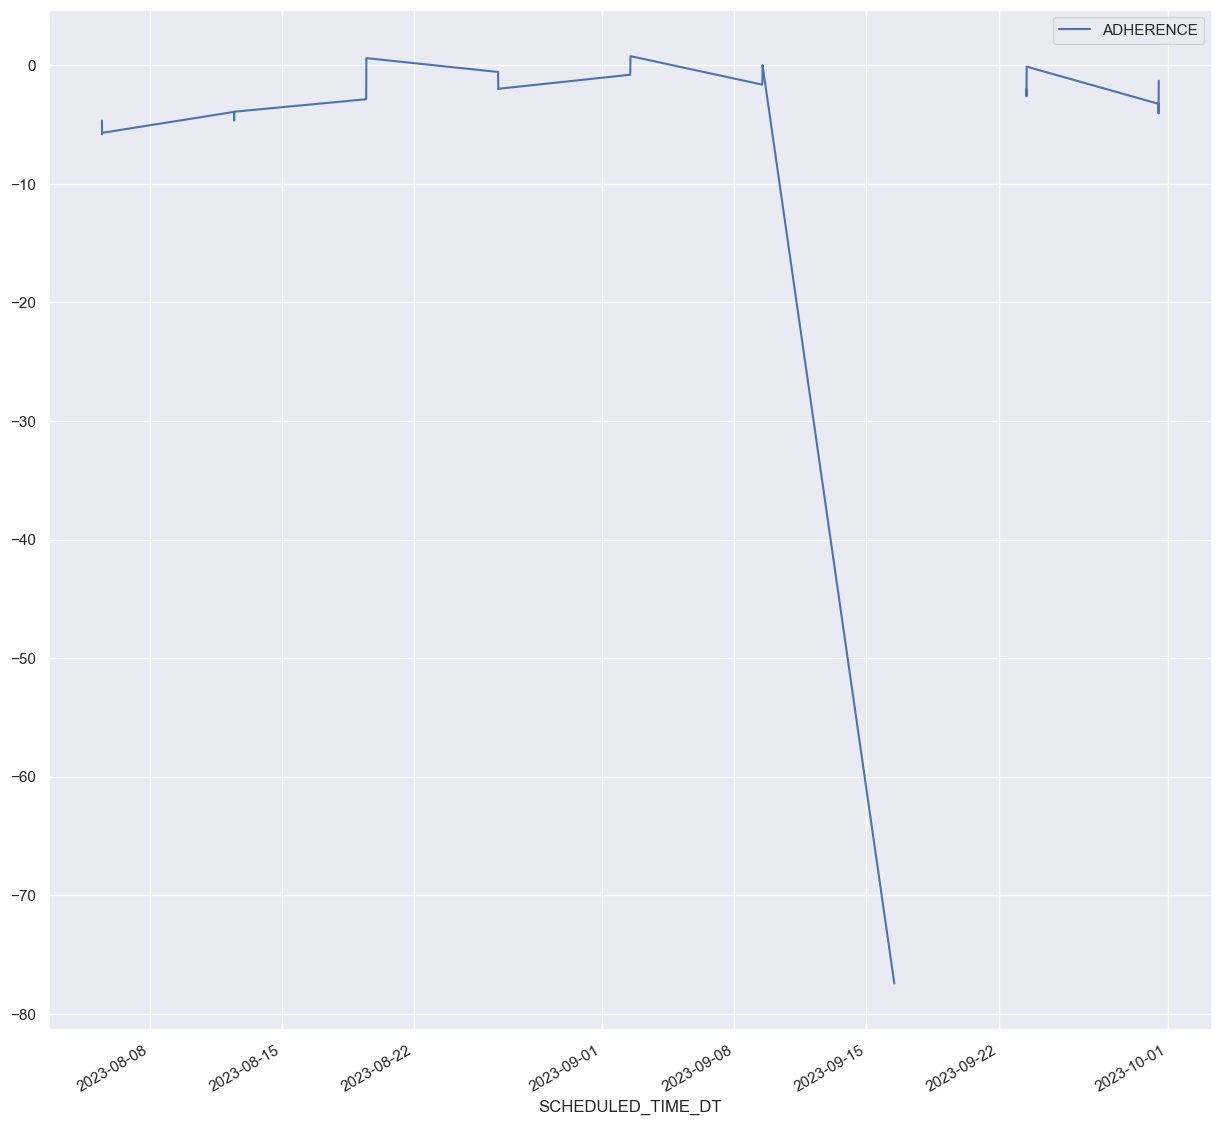

In [71]:
# data1 = bunch.loc[bunch['TRIP_ID'] == 351642]
data2 = bunch.loc[bunch['TRIP_ID'] == 349985]
# x1 = bunch['SCHEDULED_TIME_DT'].dt.hour
# data1.plot.line(bunch['HDWY_DEV'])
data2.plot.line(x='SCHEDULED_TIME_DT', y='ADHERENCE')

8. What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?

In [73]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,2023-08-01 04:42:00,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:46:00,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:54:00,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-01 05:10:00,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,2023-08-01 05:15:00,Tuesday


In [75]:
wego['ACTUAL_ARRIVAL_TIME_DT'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'])
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,SCHEDULED_TIME_DT,WEEKDAY,ACTUAL_ARRIVAL_TIME_DT
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,2023-08-01 04:42:00,Tuesday,2023-08-01 04:37:38
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:46:00,Tuesday,2023-08-01 04:48:27
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01 04:54:00,Tuesday,2023-08-01 04:54:56
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,2023-08-01 05:10:00,Tuesday,2023-08-01 05:03:43
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,2023-08-01 05:15:00,Tuesday,2023-08-01 05:03:43


In [74]:
wego['TRIP_ID'].value_counts()

TRIP_ID
353036    294
352940    294
352988    294
352287    294
353118    287
         ... 
345414      9
345415      9
345416      9
345417      9
348670      9
Name: count, Length: 3987, dtype: int64

In [91]:
wego['TRIP_ID'].dtypes

dtype('int64')

In [98]:
id_list = [353036, 352940, 352988, 352287, 353118, 345414, 345415, 345416, 345417, 348670]

time_lista = []
time_listb = []
for i, row in wego.iterrows():
    if row['TRIP_ID'] in id_list:
        # print('yes')
        if row['TRIP_EDGE'] == 1:
            time_lista.append(row['ACTUAL_ARRIVAL_TIME_DT'])
        elif row['TRIP_EDGE'] == 2:
            time_listb.append(row['ACTUAL_ARRIVAL_TIME_DT'])
    # answer = z - y
    # time_list.append(answer)

print(time_lista)
print(time_listb)

[Timestamp('2023-08-01 09:47:44'), Timestamp('2023-08-01 10:10:41'), Timestamp('2023-08-01 10:32:22'), Timestamp('2023-08-01 11:02:02'), Timestamp('2023-08-01 17:47:53'), Timestamp('2023-08-02 09:52:30'), Timestamp('2023-08-02 10:13:06'), Timestamp('2023-08-02 10:39:07'), Timestamp('2023-08-02 11:00:02'), Timestamp('2023-08-02 17:39:28'), Timestamp('2023-08-03 09:43:31'), Timestamp('2023-08-03 10:10:34'), Timestamp('2023-08-03 10:37:39'), Timestamp('2023-08-03 10:58:52'), Timestamp('2023-08-03 17:52:21'), Timestamp('2023-08-04 06:47:35'), Timestamp('2023-08-04 06:12:13'), Timestamp('2023-08-04 06:26:12'), Timestamp('2023-08-04 12:13:24'), Timestamp('2023-08-04 13:43:42'), Timestamp('2023-08-07 07:21:00'), Timestamp('2023-08-07 06:12:44'), Timestamp('2023-08-07 06:19:48'), Timestamp('2023-08-07 12:09:12'), Timestamp('2023-08-07 13:43:09'), Timestamp('2023-08-08 07:08:33'), Timestamp('2023-08-08 06:11:06'), Timestamp('2023-08-08 06:19:23'), Timestamp('2023-08-08 12:09:09'), Timestamp('20

In [104]:
total_time_list = list(set(time_listb) - set(time_lista))
# len(total_time_list)
len(time_lista)
# len(time_listb)

215

9. **Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.
This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).
How do the variables studied related to headway deviation? 